In [2]:
import scipy.io
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM,Input
from keras.layers import Dense,Bidirectional
from keras.layers import GRU
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
from matplotlib import pyplot as plt
warnings.simplefilter("ignore")

data_11 = []
y =[]
trial1=[]
p1=[]
activities = {'clapping','falling','jumping','nothing','walking','waving'}
for person in range(1,4):
    for act in activities: 
        for trial in range(1,51):
            data_1 = scipy.io.loadmat("./mat/day_1/{person}_{act}_{trial}.mat".format(person =person, act = act,trial=trial))
            data_11.append(data_1)
            act1 = act
            y.append(act1)
            tri =trial
            trial1.append(tri)
            p = person
            p1.append(p)

X_var =[]
for p in range(0,900):
    X_var.append(data_11[p]['csi_trace'])

Y_var =[]
for q in range(0,900):
    Y_var.append(y[q])
    
Z_var=[]
for r in range(0,900):
    Z_var.append(trial1[r])
Y_var[9]

'waving'

In [13]:
csi_i=[]
csi=[]
k1=[]
for i in range(0,900):
    k = X_var[i].tolist()
    cs=[]
    m2=[]
    y1=[]
    for j in range(0, len(k)):
        m2=np.array(k[j])
        y= m2[0]
        y1.append(y['csi'])
        yyy= np.array(y1[j])
        yyy1 = yyy.tolist()
        yyy2= yyy1[0][0]
        o = np.stack([np.real(yyy2), np.imag(yyy2)], axis=-1)
        cs.append(o)
    csi.append(cs)
c=0
sha1=[]
for x in range(0,900):
    if(x not in num1):
        kk=[]
        sh = csi[x]
        if(len(sh)<99):
            diff = 99-len(sh)
            kk = np.pad(sh,((0,diff), (0, 0),(0,0) , (0, 0), (0, 0)) , mode='constant' )
        if(len(sh)>99):
            kk = sh[0:99]
        if(len(sh)==99):
            kk =sh
        sha1.append(kk)
np.shape(sha1)

(855, 99, 3, 3, 30, 2)

In [14]:
shi=[]
for x in range(0,900):
    if( x not in num1):
        shi.append(Y_var[x])    
len(shi)
#np.shape(shi)

855

In [21]:
csii=np.reshape(sha1, (855,53460))
np.shape(csii)

(855, 53460)

In [147]:
from sklearn import preprocessing
import statistics

lis1 =[]
for i in sha1:
    lis = np.shape(i)
    lis1.append(lis)
#lis1

lis2=[]
for j in Y_var:
    lis2.append(j)
lis3=[]
for k in Z_var:
    lis3.append(k)
len(lis2)

900

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [148]:
def your_function(list_of_strings):

    encountered_strings = {}
    result = []
    idx = 0
    for astring in list_of_strings:
        if astring in encountered_strings:  # check if you already seen this string
            result.append(encountered_strings[astring])
        else:
            encountered_strings[astring] = idx
            result.append(idx)
            idx += 1
    return result
kk = your_function(shi)


list2 = np.array(kk)
len(list2)


855

In [150]:
X_train, X_test, y_train, y_test = train_test_split(csii, list2, test_size=0.33, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test) )

(572, 53460) (283, 53460) (572,) (283,)


In [151]:
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

disp = plot_confusion_matrix(RandomForestClassifier, X_test, y_test,
display_labels=list2, cmap=plt.cm.Blues, normalize='true')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clff=RandomForestClassifier(n_estimators=100)

clff.fit(X_train,y_train)
y_predd=clff.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predd)*100)

Accuracy: 56.8904593639576


In [27]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 25.4416961130742


Accuracy: 63.957597173144876


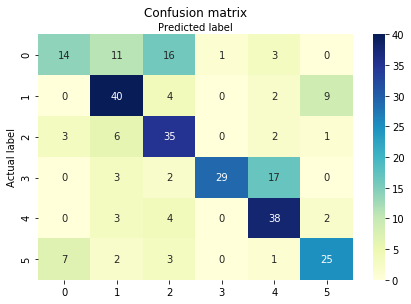

In [144]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pre)*100)


cnf_matrix = metrics.confusion_matrix(y_test, y_pre)
class_names=[0,1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of GaussianNB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pre)*100)


In [29]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier()
cl = cl.fit(X_train, y_train)
y_p = cl.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p)*100)

Accuracy: 31.448763250883395


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_p1 = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p1)*100)

Accuracy: 18.021201413427562


In [ ]:
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('ACTIVITIES')
plt.ylabel('PREDICTIONS')
plt.show()

In [12]:
#num1= [201,208,209,212,215,217,232,237,242,253,254,256,257,260,261,262,263,264,267,268,270,271,273,279,282,283,284,286,287,292,294,296,298,552,562,567,576,587,850,853,855,860,867,869,872]
#len(num1)

45

In [32]:
activities = {'clapping','falling','jumping','nothing','walking','waving'}
y_dl = to_categorical(list2, num_classes = len(activities)+1 )
np.shape(y_dl)

(855, 7)

In [43]:
csiik=np.reshape(sha1, (855,99,540))
np.shape(csiik)

(855, 99, 540)

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(csiik, y_dl, test_size=0.33, random_state=42)
print(np.shape(X_train1), np.shape(X_test1), np.shape(y_train1), np.shape(y_test1) )

(572, 99, 540) (283, 99, 540) (572, 7) (283, 7)


In [166]:

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(99,540)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(7, activation = 'softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_79 (LSTM)               (None, 99, 128)           342528    
_________________________________________________________________
lstm_80 (LSTM)               (None, 99, 128)           131584    
_________________________________________________________________
lstm_81 (LSTM)               (None, 99, 128)           131584    
_________________________________________________________________
lstm_82 (LSTM)               (None, 99, 128)           131584    
_________________________________________________________________
lstm_83 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 903       
Total params: 869,767
Trainable params: 869,767
Non-trainable params: 0
_______________________________________________

In [169]:
his = model.fit(X_train1, y_train1, epochs=30, batch_size =32)
scores= model.evaluate(X_test1, y_test1, verbose=0)
print("Accuracy : %.2f%%" % (scores[1]*100))

Epoch 1/30
572/572 [==============================] - 14s 25ms/step - loss: 0.0938 - accuracy: 0.9598
Epoch 2/30
572/572 [==============================] - 14s 24ms/step - loss: 0.1700 - accuracy: 0.9371
Epoch 3/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1750 - accuracy: 0.9441
Epoch 4/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1676 - accuracy: 0.9371
Epoch 5/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1583 - accuracy: 0.9493
Epoch 6/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1328 - accuracy: 0.9598
Epoch 7/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1806 - accuracy: 0.9406
Epoch 8/30
572/572 [==============================] - 14s 25ms/step - loss: 0.2321 - accuracy: 0.9266
Epoch 9/30
572/572 [==============================] - 14s 25ms/step - loss: 0.1805 - accuracy: 0.9423
Epoch 10/30
572/572 [==============================] - 14s 25ms/step - loss: 0.090